In [1]:
from sudoku import load_config
from sudoku.trainer.train import Train

In [2]:
PATH = './configs/train.yml'

config = load_config(PATH)

train = Train()
train.run(config)

epoch 0/5


141it [00:09, 15.65it/s]


LOSS train 2.295333353340203 valid 2.2761872145864697 - Accuracy train 0.22421689331531525 valid 0.3420138955116272
epoch 1/5


141it [00:05, 25.80it/s]


LOSS train 2.1960595736266875 valid 2.1451769736078052 - Accuracy train 0.48199862241744995 valid 0.4548611044883728
epoch 2/5


141it [00:05, 25.52it/s]


LOSS train 2.0215430589432413 valid 1.9806530045138464 - Accuracy train 0.5423069000244141 valid 0.53125
epoch 3/5


141it [00:05, 25.76it/s]


LOSS train 1.9314909776051838 valid 1.8982979191674128 - Accuracy train 0.5787283182144165 valid 0.585069477558136
epoch 4/5


141it [00:05, 25.73it/s]


LOSS train 1.8669682825710756 valid 1.8624880645010207 - Accuracy train 0.5951536297798157 valid 0.6137152910232544


In [3]:
history = train.history
history

{'loss': [2.295333353340203,
  2.1960595736266875,
  2.0215430589432413,
  1.9314909776051838,
  1.8669682825710756],
 'val_loss': [2.2761872145864697,
  2.1451769736078052,
  1.9806530045138464,
  1.8982979191674128,
  1.8624880645010207],
 'acc': [0.22421689331531525,
  0.48199862241744995,
  0.5423069000244141,
  0.5787283182144165,
  0.5951536297798157],
 'val_acc': [0.3420138955116272,
  0.4548611044883728,
  0.53125,
  0.585069477558136,
  0.6137152910232544]}

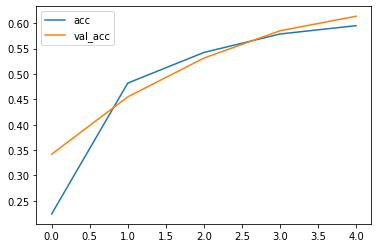

In [4]:
import matplotlib.pyplot as plt
plt.plot(history['acc'], label='acc')
plt.plot(history['val_acc'], label='val_acc')
plt.legend()

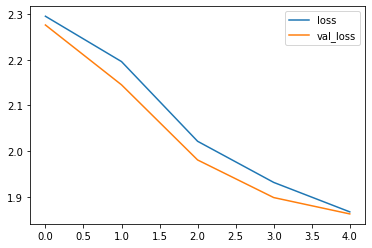

In [5]:
import matplotlib.pyplot as plt
history = train.history
plt.plot(history['loss'], label='loss')
plt.plot(history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
import yaml

steam = open('./configs/train.yml', 'r')
config = yaml.load(steam)
config["Global"]

In [ ]:
import torch

torch.load('./mode_weight/pytorch.pth')

In [ ]:
from Sudoku.Feature_Extractor import FeatureExtracter
from Sudoku.Solve_Sudoku import SolveSudoku
import cv2
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread(r'C:\Users\admin\Documents\Project\sudoku-cv\data\images\image156.jpg')

In [ ]:
fex = FeatureExtracter(img, './mode_weight/pytorch.pth')
pred, imgs = fex()

In [ ]:
pred

In [ ]:
plt.figure(figsize=(15, 20))
for i in range(len(imgs)):
    plt.subplot(9, 9, i+1)
    # plt.imshow(imgs[i])
    plt.imshow(imgs[i].numpy().transpose(1, 2, 0))
    plt.title(pred.flatten()[i])

plt.show()

In [ ]:
grid = list(pred.numpy())
sol = SolveSudoku(grid)
sol()

In [ ]:
grid

In [ ]:
import torch

def transform(image):
    # some transformation that returns a tensor
    tensor = torch.randn(1, 3, 224, 224)
    return tensor[0]  # return a tensor with only one element

# create a list of inputs
inputs = [torch.randn(3, 224, 224), torch.randn(3, 224, 224)]

# apply the transform to each input
outputs = [transform(input) for input in inputs]

# convert the list of tensors to a tensor
tensor = torch.Tensor(outputs)

In [ ]:
import torch
from Classifier.model.backbone import CNN
from Classifier.loader.dataloader import DataLoader

In [ ]:
cnn = CNN(10)

In [ ]:
a = cnn.load_state_dict(torch.load('./mode_weight/pytorch.pth'))

In [ ]:
x = torch.rand((1, 3, 32, 32))

In [ ]:
a(x)

In [ ]:
a = cnn

In [ ]:
a

In [ ]:
PATH = './train_data/number_classifer/'
loader = DataLoader(PATH)
dataset = loader.load_data()
train_set, val_set = loader.split_data(dataset, 0.2)
train_loader = loader.dataloader(train_set)
val_loader = loader.dataloader(val_set)

In [ ]:
a = next(iter(val_loader))
loader.display_data(a)

In [ ]:
x, y = a

In [ ]:
y_hat = cnn(x)
print(torch.argmax(y_hat, 1))
print(y)
    

In [ ]:
x = next(iter(val_loader))[0][1]

In [ ]:
z = x.numpy().transpose(1, 2, 0)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(z)

In [ ]:
torch.argmax(cnn(x.reshape(1, 3, 32, 32)), 1)